In [ ]:
 !pip install langdetect

     |████████████████████████████████| 981 kB 4.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993241 sha256=96378f6b927053e9910d975422f60f8c162d7f046200bbb1bb625263981a0cf8
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
pip install https://github.com/MartinoMensio/spacy-universal-sentence-encoder/releases/download/v0.4.3/en_use_md-0.4.3.tar.gz#en_use_md-0.4.3

     |████████████████████████████████| 6.3 MB 4.4 MB/s 
     |████████████████████████████████| 10.1 MB 47.7 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 621 kB 37.7 MB/s 
     |████████████████████████████████| 456 kB 42.9 MB/s 
  Created wheel for en-use-md: filename=en_use_md-0.4.3-py3-none-any.whl size=24373 sha256=e88f425fb46bf57766fa331d34fb623d9c2a54fb9d2f7157ce4060b6db6595e3
  Stored in directory: /root/.cache/pip/wheels/eb/ea/ff/b222ecfaffd69f3bd363bd2bf098ba556b3f478a32407f884a
  Created wheel for spacy-universal-sentence-encoder: filename=spacy_universal_sentence_encoder-0.4.3-py3-none-any.whl size=14764 sha256=d93dd5c89ccb37c407406d85b4a6607c7c1d7f98a518ec2a5fc6c3bb484e6dbb
  Stored in directory: /root/.cache/pip/wheels/ad/b6/25/b72e0f73e0e5ea76ec803d27aa9fe4f17640bc6c109cb3bff4
Successfully built en-use-md spacy-universal-sentence-encoder
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1

In [ ]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
import spacy

In [ ]:
import langdetect

In [ ]:
from langdetect import detect

In [ ]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Data/Capstone/input_data-1.xlsx')
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
df.shape

(8500, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
df.describe().transpose()

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7817,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


In [ ]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
nan_values = df[df.isna().any(axis=1)]
nan_values

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [ ]:
#df.dropna(inplace = True)
df = df.fillna('and')

In [ ]:
df.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [ ]:
df.shape

(8500, 4)

In [ ]:
# Selecting duplicate rows 
duplicate = df[df.duplicated()]
  
print("Duplicate Rows :")
  
# Print the resultant dataframe
duplicate

Duplicate Rows :


,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24
8051,issue on pricing in distributor_tool,we have agreed price with many of the distribu...,hbmwlprq ilfvyodx,GRP_21
8093,reset passwords for prgthyuulla ramdntythanjes...,the,boirqctx bkijgqry,GRP_17
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0


In [ ]:
df.drop_duplicates()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [ ]:
# Select all duplicate rows based on multiple column names in list
duplicateSubsetColsDF = df[df.duplicated(['Short description', 'Description'])]
duplicateSubsetColsDF

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
81,erp SID_34 account locked,erp SID_34 account locked,ilvortuq zfgrlewm,GRP_0
123,unable to display expense report,unable to display expense report,rbozivdq gmlhrtvp,GRP_0
157,ess password reset,ess password reset,mtgujlcb kczyvpqr,GRP_0
181,unable to connect to vpn,unable to connect to vpn,aljbtwsh lepkbgix,GRP_19
...,...,...,...,...
8424,windows account lockout,windows account lockout,hvjmxkcp pvzlgeyw,GRP_0
8450,unable to connect to wifi,unable to connect to wifi,incjpxsq gdxbvaqz,GRP_0
8451,password reset erp SID_34,password reset erp SID_34,rcukxbvw pvnuqlyb,GRP_0
8458,windows account locked,windows account locked,nfckwprm iykptjna,GRP_0


In [ ]:
df['Short description'].str.len().max()

159

In [ ]:
shortdes = max(df['Short description'], key=len)
shortdes

'erp production order printing issue : connection to system production_order_interface_app with destination production_order_interface_vendor-connc is not okay.'

In [ ]:
df['Description'].str.len().max()

13001

In [ ]:
longdes = max(df['Description'], key = len)
longdes

'we are seeing activity indicating the host at 46.161.9.35 is conducting a vulnerability scan. these scans are used to identify specific vulnerabilities on a remote host that could be exploited to potentially interfere with service availability, execute code, or usa an attacker with unauthorized access. the results of this scan could be used for future attacks or exploitation of the targeted host(s). \r\n\r\nbased on our internet visibility we are detecting this as a non-targeted broadscan. similar activity from this source has been detected across our client base. please consider blocking this ip address and investigating the host for any malicious scrip\r\n\r\nwe are escalating this incident to you via a medium priority ticket as per our default event handling procedures. if you would like us to handle these incidents differently in the future (see below for handling options), or if you have any further questions or concerns, please let us know either by corresponding to us via this 

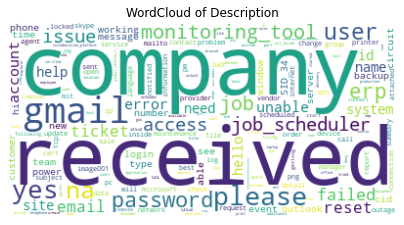

In [ ]:
#Creating the text variable
text = " ".join(df['Description'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of Description")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

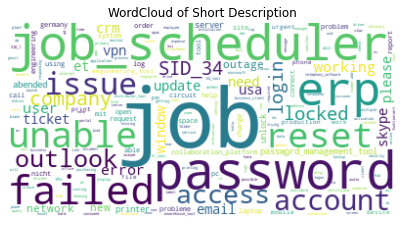

In [ ]:
#Creating the text variable
text = " ".join(df['Short description'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of Short Description")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

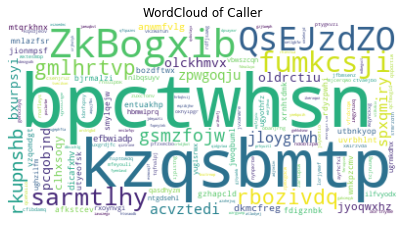

In [ ]:
#Creating the text variable
text = " ".join(df['Caller'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of Caller")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

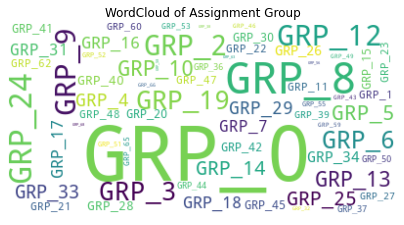

In [ ]:
#Creating the text variable
text = " ".join(df['Assignment group'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of Assignment Group")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_73       1
GRP_67       1
GRP_35       1
GRP_70       1
GRP_61       1
Name: Assignment group, Length: 74, dtype: int64

In [ ]:
dffilter = df.groupby("Assignment group").filter(lambda x: len(x) > 100)
dffilter.shape

(7030, 4)

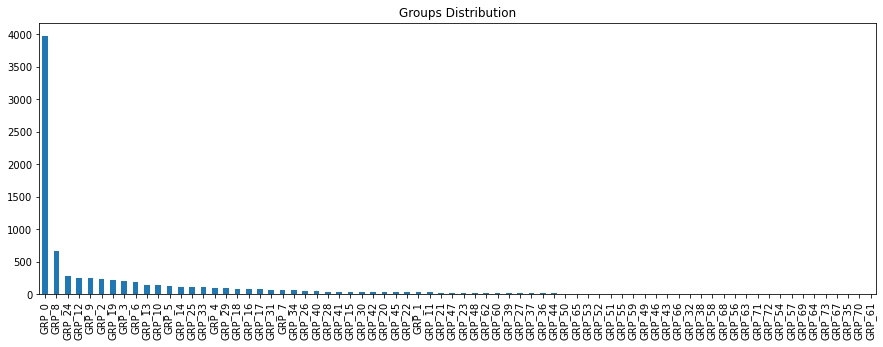

In [ ]:
df['Assignment group'].value_counts().plot(kind='bar', figsize=(15,5), title='Groups Distribution')

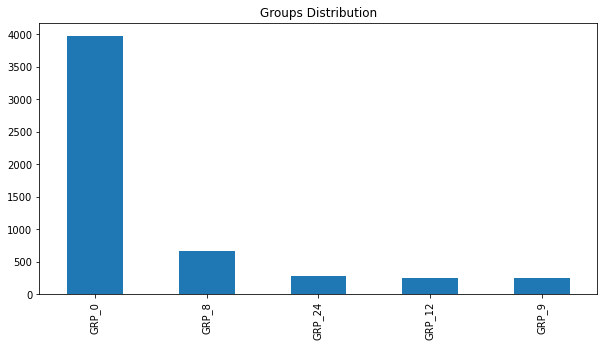

In [ ]:
df['Assignment group'].value_counts()[0:5].plot(kind='bar',figsize=(10,5), title='Groups Distribution')

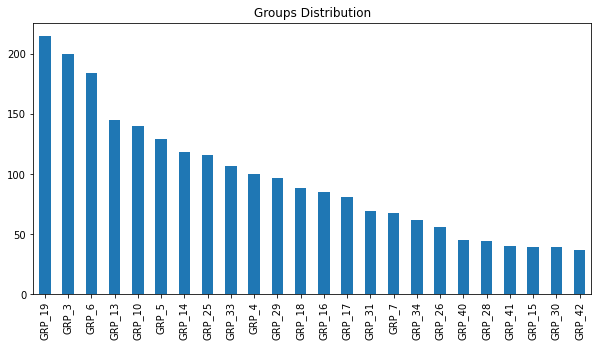

In [ ]:
df['Assignment group'].value_counts()[6:30].plot(kind='bar', figsize=(10,5), title='Groups Distribution')

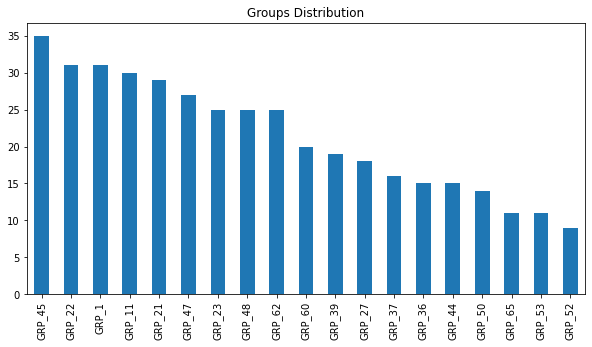

In [ ]:
df['Assignment group'].value_counts()[31:50].plot(kind='bar', figsize=(10,5), title='Groups Distribution')

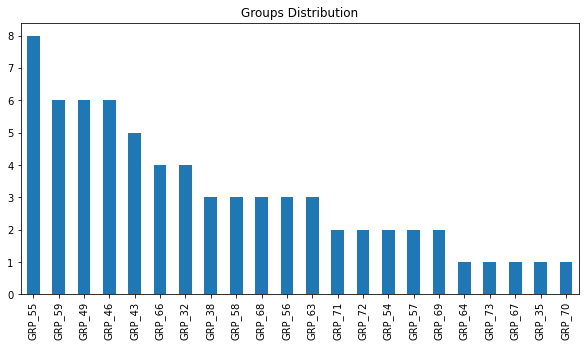

In [ ]:
df['Assignment group'].value_counts()[51:73].plot(kind='bar', figsize=(10,5), title='Groups Distribution')

In [ ]:
agunique = df['Assignment group'].unique()
agunique.shape

(74,)

In [ ]:
unique = df['Caller'].unique()
unique.shape

(2950,)

In [ ]:
df['Caller'].value_counts()

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
                    ... 
wakqbrfx olynbudg      1
mopuczxh mflsykip      1
vydbqise wkjrmxqh      1
dmlnpgkv ophsnmbr      1
gvtbduyf gdblxiva      1
Name: Caller, Length: 2950, dtype: int64

[]

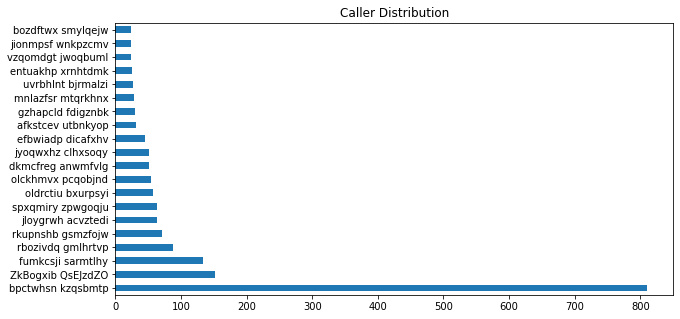

In [ ]:
# Top 20 callers
df['Caller'].value_counts()[0:20].plot(kind='barh', figsize=(10,5), title='Caller Distribution')
plt.plot()

In [ ]:
df

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [ ]:
#df['CombinedDescription'] = df['Short description'].str.cat(df['Description'], sep=' ', na_rep=' ')

In [ ]:
def convertToLower(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

In [ ]:
def sanitizeDataset(dataset, columnsToSanitize, regexList):
    for column in columnsToSanitize:
        for regex in regexList:
            dataset[column] = convertToLower(dataset[column], regex)
    return dataset

In [ ]:
def getRegularexpressionList():
   
    regularexList = []
    regularexList += ['From:(.*)\r\n']  # from
    regularexList += ['Sent:(.*)\r\n']  # sent
    regularexList += ['received from:(.*)\r\n']  # received from
    regularexList += ['received']  # received
    regularexList += ['To:(.*)\r\n']  # to
    regularexList += ['CC:(.*)\r\n']  # cc
    regularexList += ['(.*)infection']  # footer
    regularexList += ['\[cid:(.*)]']  # cid images
    regularexList += ['https?:[^\]\n\r]+']  # https & http
    regularexList += ['Subject:'] # subject
    regularexList += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+']  # emails
    regularexList += ['[0-9][\-0–90-9 ]+']  # phone numbers
    regularexList += ['[0-9]']  # numbers
    regularexList += ['[^a-zA-z 0-9]+']  # non alphanumberic
    regularexList += ['[\r\n]']  # \r\n # tab & new line
    regularexList += [' [a-zA-Z] ']  # single letters
    regularexList += [' [a-zA-Z][a-zA-Z] ']  # two-letter words
    regularexList += ["  "]  # double spaces
    
    regularexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$'] #email address
    regularexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regularexList += ['Subject:']
    #regularexList += ['[^a-zA-Z]']

    return regularexList

In [ ]:
# Clean Short Description & Description separately
mods_df = sanitizeDataset(df, ['Short description'], getRegularexpressionList())
modd_df = sanitizeDataset(mods_df, ['Description'], getRegularexpressionList())

In [ ]:
modd_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,GRP_0
1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,GRP_0
2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,GRP_0
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
# Load the wrapper
nlp = spacy.load('en_use_md')

#df.drop("spacy_score", axis=1)
modd_df.insert(3, 'spacy_score', '0')

# Calcuate the Spacy Score for each row between Short Description and Description
for i in modd_df.index:
  modd_df.spacy_score[i] = round(nlp(modd_df.values[i][0]).similarity(nlp(modd_df.values[i][1])),1)
  

Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB



In [ ]:
modd_df

,Short description,Description,Caller,spacy_score,Assignment group
0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,GRP_0
1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,GRP_0
2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,GRP_0
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,1,GRP_0
...,...,...,...,...,...
8495,emails not coming from mail,good afternoon not receiving the emails tha...,avglmrts vhqmtiua,0.7,GRP_29
8496,telephony software issue,telephony software issue,rbozivdq gmlhrtvp,1,GRP_0
8497,vip windows password reset for tifpdchb pedxruyf,vip windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,1,GRP_0
8498,machine o est funcionando,i unable access the machine utilities finish t...,ufawcgob aowhxjky,0.1,GRP_62


In [ ]:
# selecting rows based on condition 
rslt_df = modd_df[modd_df['spacy_score'] == 1.0]
rslt_df

,Short description,Description,Caller,spacy_score,Assignment group
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,1,GRP_0
5,unable log to engineering tool and skype,unable log to engineering tool and skype,eflahbxn ltdgrvkz,1,GRP_0
7,ticket employment status new non employee ent...,ticket employment status new non employee ent...,eqzibjhw ymebpoih,1,GRP_0
8,unable disable add ins outlook,unable disable add ins outlook,mdbegvct dbvichlg,1,GRP_0
...,...,...,...,...,...
8489,account locked,account locked,sdvlxbfe ptnahjkw,1,GRP_0
8492,hr tool etime option not visitble,hr tool etime option not visitble,tmopbken ibzougsd,1,GRP_0
8494,tablet needs reimaged due multiple issues with...,tablet needs reimaged due multiple issues with...,cpmaidhj elbaqmtp,1,GRP_3
8496,telephony software issue,telephony software issue,rbozivdq gmlhrtvp,1,GRP_0


In [ ]:
modd_df.insert(4, 'CombinedDescription', '0')

In [ ]:
# Combine Description and Short Description text based on the Spacy Score
for i in modd_df.index:
    if modd_df.spacy_score[i] == 1.0:
       modd_df.CombinedDescription[i] = str(modd_df['Short description'][i])
    else:
       modd_df.CombinedDescription[i] = str(modd_df['Short description'][i]) + str(modd_df.Description[i])

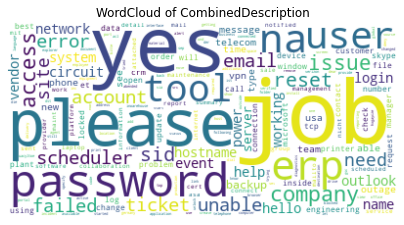

In [ ]:
#Creating the text variable
text = " ".join(modd_df['CombinedDescription'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of CombinedDescription")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
modd_df['SanitizedDescription'] = modd_df['CombinedDescription']
mod_df = sanitizeDataset(modd_df, ['SanitizedDescription'], getRegularexpressionList())

In [ ]:
mod_df

,Short description,Description,Caller,spacy_score,CombinedDescription,Assignment group,SanitizedDescription
0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,login issue verified user details employee ma...,GRP_0,login issue verified user details employee man...
1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,outlook hello team meetings skype meetings e...,GRP_0,outlook hello team meetings skype meetings et...
2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,cant log to vpn cannot log to vpn best,GRP_0,cant log vpn cannot log vpn best
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1,unable access tool page,GRP_0,unable access tool page
4,skype error,skype error,owlgqjme qhcozdfx,1,skype error,GRP_0,skype error
...,...,...,...,...,...,...,...
8495,emails not coming from mail,good afternoon not receiving the emails tha...,avglmrts vhqmtiua,0.7,emails not coming from mail good afternoon n...,GRP_29,emails not coming from mail good afternoon no...
8496,telephony software issue,telephony software issue,rbozivdq gmlhrtvp,1,telephony software issue,GRP_0,telephony software issue
8497,vip windows password reset for tifpdchb pedxruyf,vip windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,1,vip windows password reset for tifpdchb pedxruyf,GRP_0,vip windows password reset for tifpdchb pedxruyf
8498,machine o est funcionando,i unable access the machine utilities finish t...,ufawcgob aowhxjky,0.1,machine o est funcionandoi unable access the m...,GRP_62,machine est funcionandoi unable access the mac...


In [ ]:
mod_df.to_csv('/content/drive/MyDrive/Data/moddf5.csv')

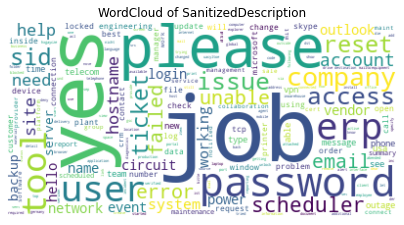

In [ ]:
#Creating the text variable
text = " ".join(mod_df['SanitizedDescription'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of SanitizedDescription")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
print(detect("Geeksforgeeks es un portal informático para geeks"))

es


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/moddf5.csv')
df.head()

,Unnamed: 0,Short description,Description,Caller,spacy_score,CombinedDescription,Assignment group,SanitizedDescription
0,0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,login issue verified user details employee ma...,GRP_0,login issue verified user details employee man...
1,1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,outlook hello team meetings skype meetings e...,GRP_0,outlook hello team meetings skype meetings et...
2,2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,cant log to vpn cannot log to vpn best,GRP_0,cant log vpn cannot log vpn best
3,3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1.0,unable access tool page,GRP_0,unable access tool page
4,4,skype error,skype error,owlgqjme qhcozdfx,1.0,skype error,GRP_0,skype error


In [ ]:
sanitized = df['SanitizedDescription']

In [ ]:
languages_langdetect = []
for line in sanitized:
    try:
        result = langdetect.detect_langs(line)
        result = str(result[0])[:2]
    except:
        result = 'unknown'
    
    finally:
        languages_langdetect.append(result)

In [ ]:
df['languages_langdetect'] = languages_langdetect

In [ ]:
df.head()

,Unnamed: 0,Short description,Description,Caller,spacy_score,CombinedDescription,Assignment group,SanitizedDescription,languages_langdetect
0,0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,login issue verified user details employee ma...,GRP_0,login issue verified user details employee man...,en
1,1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,outlook hello team meetings skype meetings e...,GRP_0,outlook hello team meetings skype meetings et...,en
2,2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,cant log to vpn cannot log to vpn best,GRP_0,cant log vpn cannot log vpn best,no
3,3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1.0,unable access tool page,GRP_0,unable access tool page,it
4,4,skype error,skype error,owlgqjme qhcozdfx,1.0,skype error,GRP_0,skype error,no


In [ ]:
df.to_csv('/content/drive/MyDrive/Data/langdetect5.csv')

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
cleandocs = list()

for desc in mod_df['SanitizedDescription']:
    wt = word_tokenize(desc) 
    
    filterdoc = [] 

    # Removing Stopwords
    for w in wt: 
        if w not in stop_words: 
            filterdoc.append(w) 
    
    # Lemmetization
    lemma_word = []
    wnl = WordNetLemmatizer()
    for w in filterdoc:
        word1 = wnl.lemmatize(w, pos = "n")
        word2 = wnl.lemmatize(word1, pos = "v")
        word3 = wnl.lemmatize(word2, pos = ("a"))
        lemma_word.append(word3)
    words = ' '.join(lemma_word)
    cleandocs.append(words)

In [ ]:
round(0.99, 1)

1.0